In [1]:
!pip install langgraph

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from typing_extensions import TypedDict

class WeatherState(TypedDict):
    message: str

In [3]:
def weather(state: WeatherState):
  state["message"] = "날씨를 예측해보겠습니다 ... "
  return state

In [ ]:
def rainy_weather(state: WeatherState):
  state["message"] += "비가 올 것 같으니 우산을 챙겨주세요."
  return state

In [5]:
def sunny_weather(state: WeatherState):
  state["message"] += "맑은 날이 될 걸로 보이니 선크림을 준비하세요." 
  return state

In [6]:
import random
from typing import Literal

def forecast_weather(state: WeatherState)->Literal["rainy", "sunny"]:
  if random.random() < 0.5:
    return "rainy"
  else:
    return "sunny"

In [7]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(WeatherState)
workflow.add_node("weather", weather)
workflow.add_node("rainy", rainy_weather)
workflow.add_node("sunny", sunny_weather)

workflow.add_edge(START, "weather")
workflow.add_conditional_edges("weather", forecast_weather)
workflow.add_edge("rainy", END)
workflow.add_edge("sunny", END)
app = workflow.compile()

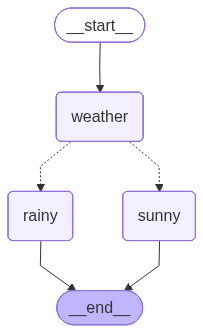

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
app.invoke({"message":"안녕! 내일 날씨는 어떻게 될까?"})

{'message': '날씨를 예측해보겠습니다 ...  비가 올 것 같으니 우산을 챙겨주세요.'}

In [15]:
app.invoke({"message":"2+2는 얼마야?"})

{'message': '날씨를 예측해보겠습니다 ...  비가 올 것 같으니 우산을 챙겨주세요.'}